## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is when we use features/covariates to predict a numeric continuous response variable, classification is when we use features/covariates to predict a categorical variable.

2. A confusion table cross-tabulates the actual and predicted values, showing where the model predicts class labels correctly, but also what predictions are made when the model makes mistakes.

3. Accuracy is the proportion of labels correctly predicted. A model can be accurate in general, but make systematic errors that make it too costly for practical use; for example, when it makes mistakes, a medical test tends to predict the patient is healthy when they're not.

4. SSE quantifies the squared error that a model generates. We take the difference between true and predicted values, square it to ensure the values are positive, then sum over all predictions. This provides a measure of how far off the model is from the truth.

5. Overfitting is when a model is too complex for the data available, and the extra degrees of freedom are used to fit features of the training data that are unlikely to generalize. Underfitting is when a model is too simple for the data available, and cannot capture important features of the phenomenon. In either case, the model is unreliable for actual use.

6. By splitting the data and testing the model on "data it hasn't seen," we replicate the use of the actual model in practice on future data that has not yet arrived. This gives us a more accurate estimate of how the model will perform in novel use cases, rather than the ones it was trained on.

7. Class label predictions are easily interpreted, but if the probabilities are not reported, it's unclear how "certain" the prediction was: Between labels A and B, the classification probabilities might be .51/.49, but the predicted label will be A.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

(338, 4)
    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


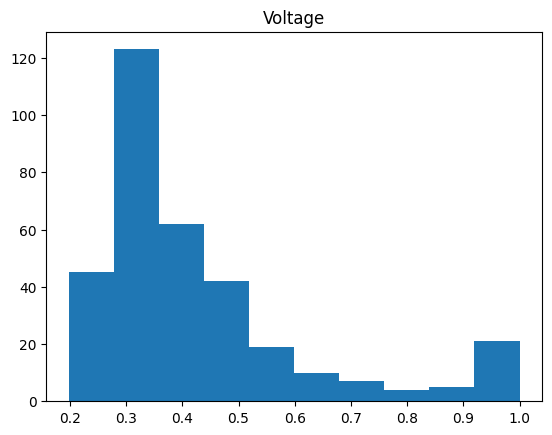

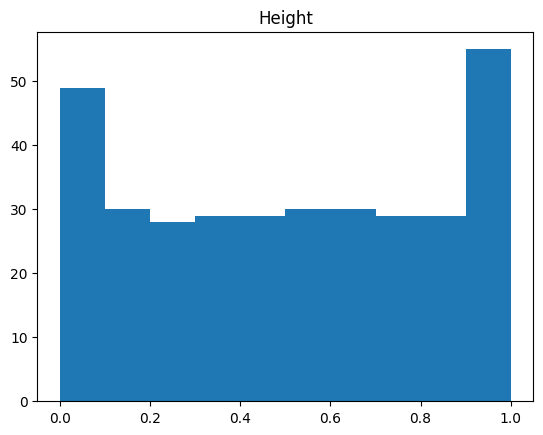

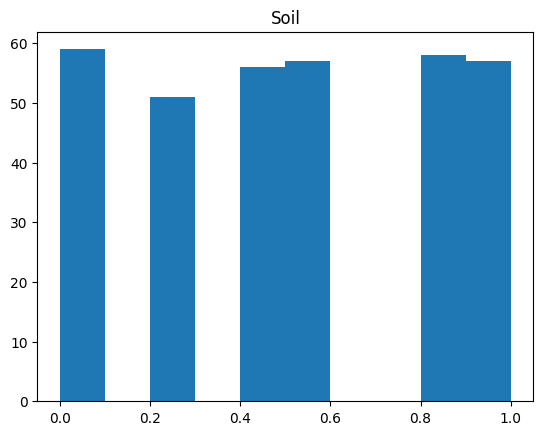

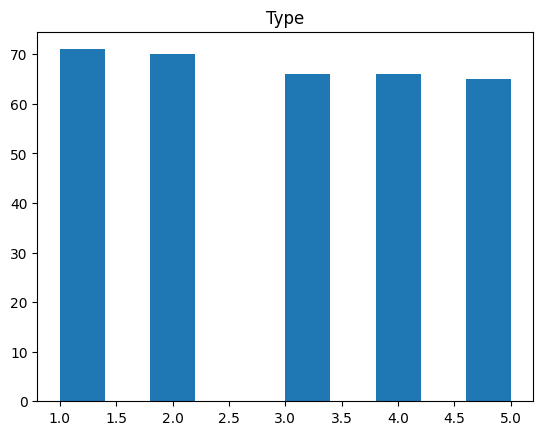

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


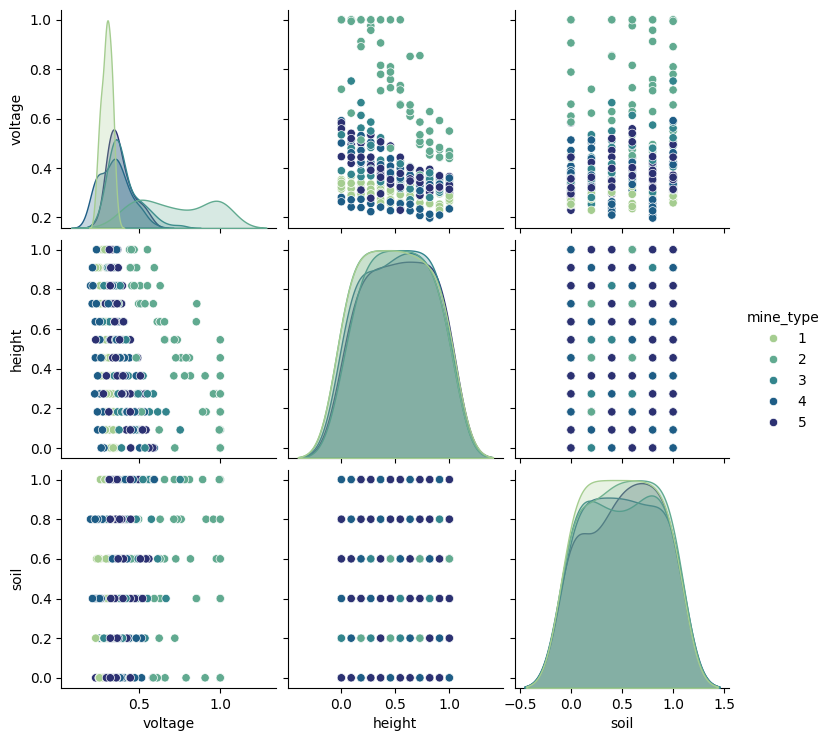

In [2]:
#1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('./land_mines.csv')

print(df.shape)
print(df.head())
print(df.describe())

df['voltage'].hist(grid=False)
plt.title('Voltage')
plt.show()

df['height'].hist(grid=False)
plt.title('Height')
plt.show()

df['soil'].hist(grid=False)
plt.title('Soil')
plt.show()

df['mine_type'].hist(grid=False)
plt.title('Type')
plt.show()

sns.pairplot(df, hue="mine_type", palette='crest')

based on this preliminary analysis its clear that the number 2 mine types have a higher voltage, number 1 have a lower voltage, and soil and height are generally evenly distributed amont the 5

In [3]:
#2
y = df['mine_type'] # Target variable
X = df.loc[:,['voltage','height','soil']] # Create feature matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 80 train/ 20 test
                                                    random_state=200) # For replication purposes


Maximum accuracy:  0.41420118343195267
Optimal k:  [2]


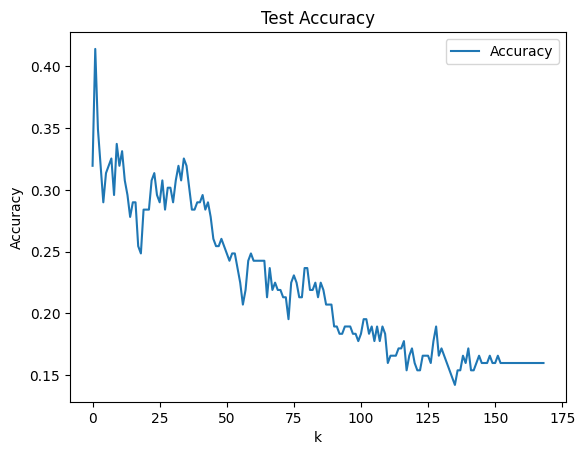

In [5]:
#3
k_bar = N_train # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data
Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print('Maximum accuracy: ', Acc_max)
print('Optimal k: ', k_star)


## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

since the mines being predicted are categorical, k is usually predicted by computing the distances between x_hat and the data, finding the smallest k values in the distance, finding the g  (modal case) for nearest neighbors, and returing the probability in a dictionary.

since we are using sklearn we create an sk model and train model on data returing the accuracy amount and then picking the highest recorded accuracy

In [6]:
#4

## Confusion Table:
print(pd.crosstab(y_hat, y_test))

print('The accuracy is around 40%, which is probably not something you want to risk lives or limbs on.')
print('When 1 is predicted, it is often 1, but often 3,4,5 as well.')
print('When 2 is predicted, the prediction is pretty reliable.')
print('When 3 or 4 are predicted, it could be any of the types.')
print('When 5 is predicted, the results are bad.')

mine_type   1   2   3   4   5
row_0                        
1          23   1  12  14  11
2           0  32   1   5   1
3           9   4  10   9  15
4           4   3   3   4   2
5           1   0   1   3   1
The accuracy is around 40%, which is probably not something you want to risk lives or limbs on.
When 1 is predicted, it is often 1, but often 3,4,5 as well.
When 2 is predicted, the prediction is pretty reliable.
When 3 or 4 are predicted, it could be any of the types.
When 5 is predicted, the results are bad.


The takeaways printed are determined by the number in each row and column. (since 1 is low when 2 is predicted there is a low error for predicting 1 when predicting 2)

2 is the only option that can be relied on and 5 is the least reliable based on the confusion table output